# <center>EPIB 613 INTRODUCTION TO STATISTICAL SOFTWARE</center>

<center> McGill EBOH </center>

<center> Fall 2020 </center>

<center> Yi Lian </center>

# Lecture 5: Graphics with R
- Plotting
- Multiple plots on one page
- Save plots

There are different packages in R that suit all kinds of plotting needs people may have.
- <b>graphics</b>
    - In base R and loads automatically every time you open R
- <b>grid</b>
    - In base R but does not load automatically
- <b>ggplot2</b>
    - Not in base R
    - Create Elegant Data Visualisations Using the Grammar of Graphics
    - Depends on <b>grid</b>
- ...

Today we use <b>graphics</b> and <b>ggplot2</b> to draw various 2D plots.

https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/00Index.html

https://rstudio.com/resources/cheatsheets/

In [1]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [2]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

# 5.1 Plotting
### Functions in graphics package:
#### New plot
- plot( )
- pie( )
- boxplot( )
- hist( )
- curve( )
- ...

#### Add to existing plot
- lines( )
- points( )
- abline( )
- legend( )
- axis( )
- grid( )
- ...

### Parameters
Parameters are used to customize your plots. I will show the use of some parameters here and there in the lecture. 

There are many so you will not see all the parameters here. Check out the link below or google when you need to plot something fancy.

https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/par.html

Different parameters are allowed in different functions. Parameters can also be specified before plotting using <b>par( )</b>.

## 5.1.1 Scatter plot
Generally used to show the relationship of two variables.
#### Sepal width vs sepal length 

In [3]:
unique(iris$Species)

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

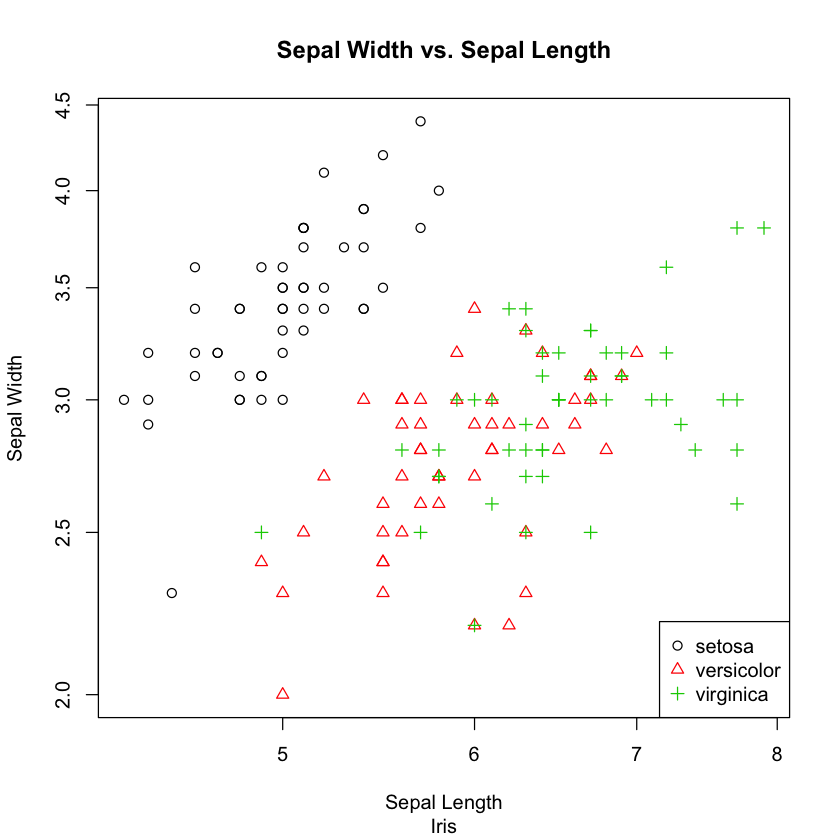

In [4]:
# Some parameters related to titles, labels, limits...
plot(x = iris$Sepal.Length, y = iris$Sepal.Width,
     main = "Sepal Width vs. Sepal Length",    # Title
     sub = "Iris",                             # Sub title
#      xlim = range(iris$Sepal.Length),          # limits of x-axis
#      ylim = c(1, 10),                          # Limits of y-axis
     xlab = "Sepal Length",                    # Label of x-axis
     ylab = "Sepal Width",                     # Label of y-axis
     log = "xy",                                # Axis to be set on log scale
     col = iris$Species,                       # color
     pch = as.numeric(iris$Species),           # point type
#      axes = F,
)            
# x and y are arguments - these two are sufficient for a plot
# In this plot, I specified some most basic graphical parameters.

# Add legends
legend("bottomright",
       legend = unique(iris$Species),
       col = unique(iris$Species),
       pch = as.numeric(unique(iris$Species))
)

##### Reproduce with ggplot2

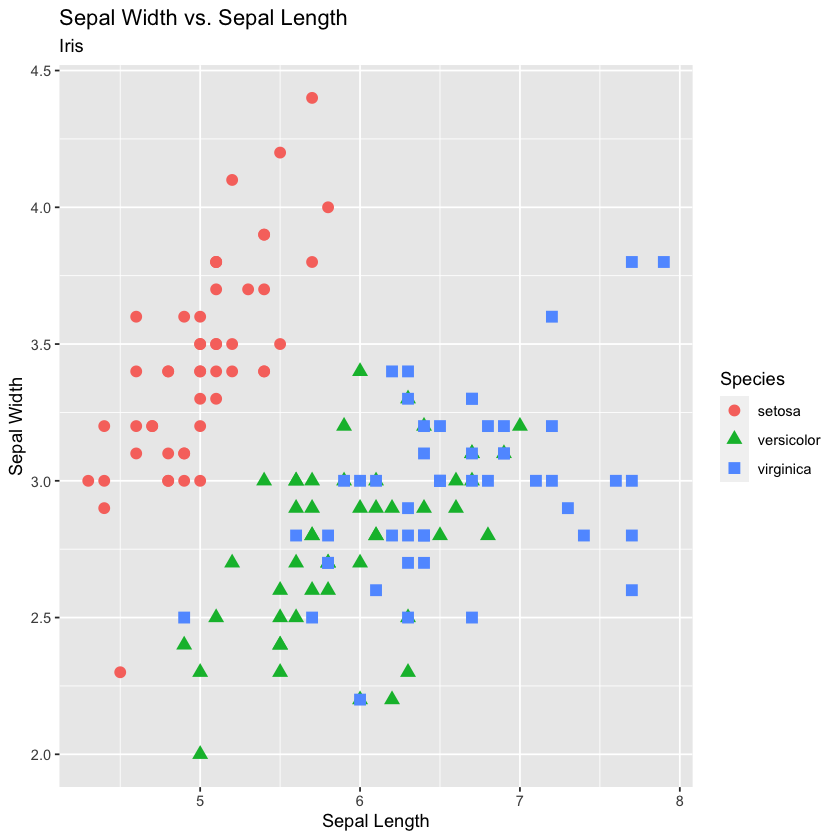

In [5]:
# ggplot2
library(ggplot2)
e <- ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species, shape = Species)) +
        geom_point(size = 3) +
        labs(title = "Sepal Width vs. Sepal Length",
             subtitle = "Iris",
             x = "Sepal Length",
             y = "Sepal Width")
e

##### See the changes in lengths

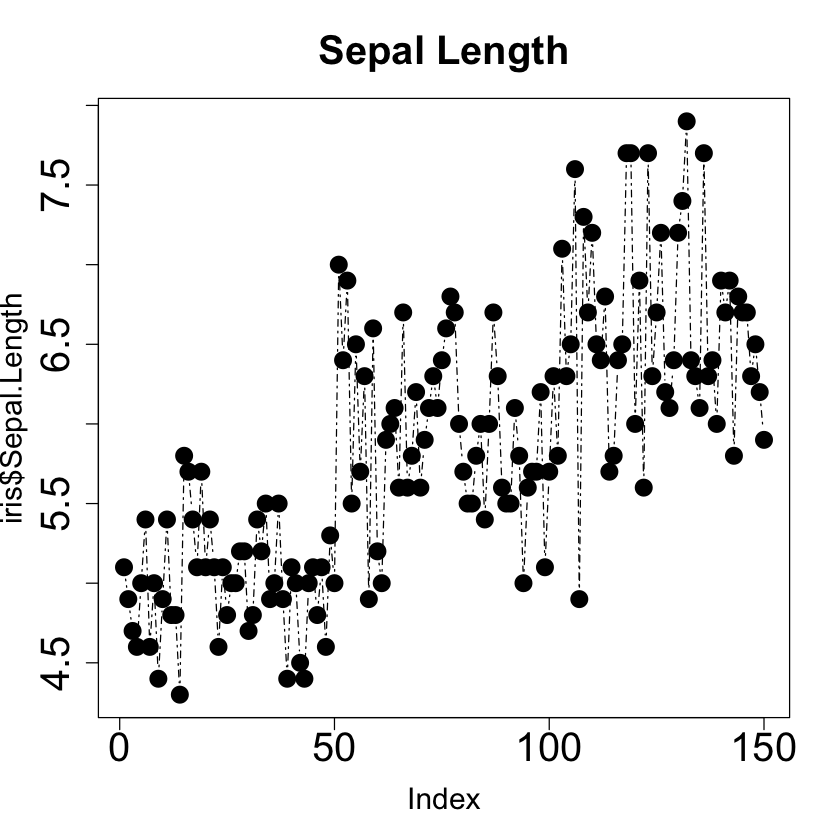

In [6]:
# Some parameters related to text and plot size.
plot(x = iris$Sepal.Length,
     type = "b",    # Type of plot
     pch = 16,     # plotting symbols, 1~25 plus anything you want.
     cex = 2,       # Plotting text and symbol size
     cex.axis = 2,  # Axis annotation size
     main = "Sepal Length", 
     cex.main = 2,  # Title text size
     cex.lab = 1.5,   # Axis label size
     lwd = 1,       # Line width
     lty = 4,
)

##### Reproduce with ggplot( )

In [7]:
length(mdeaths)

[1] 72

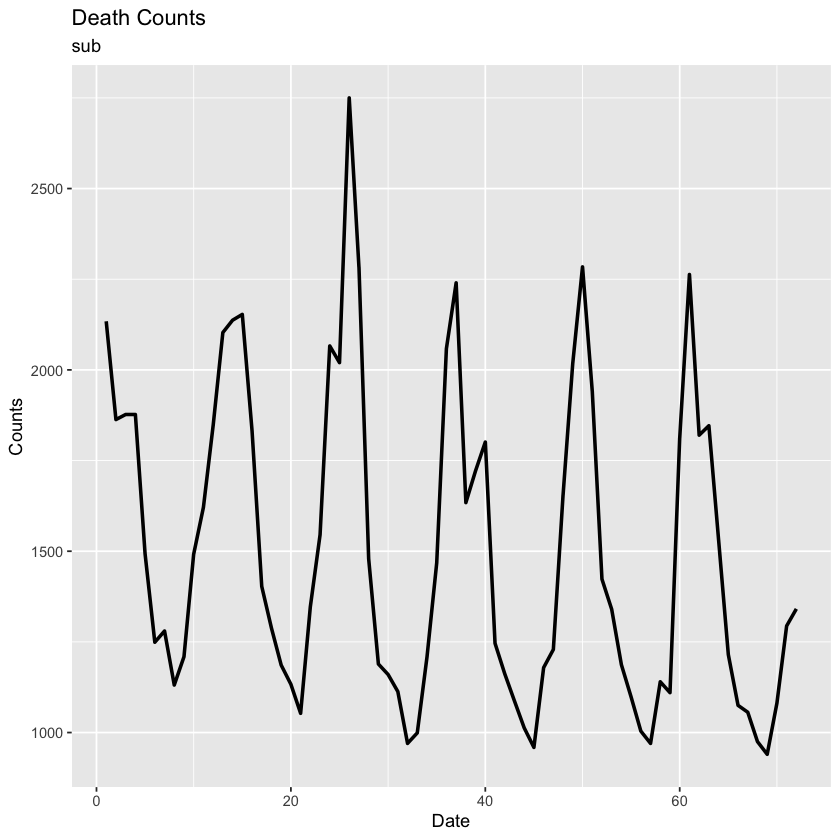

In [8]:
md <- data.frame(Index = 1:length(mdeaths), Count = c(mdeaths))
e <- ggplot(md, aes(Index, Count)) +
        geom_line(size = 1) +
        labs(title = "Death Counts",
             subtitle = "sub",
             x = "Date",
             y = "Counts")
e

## 5.1.2 Pie plot
Proportions of categorical variables

In [9]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

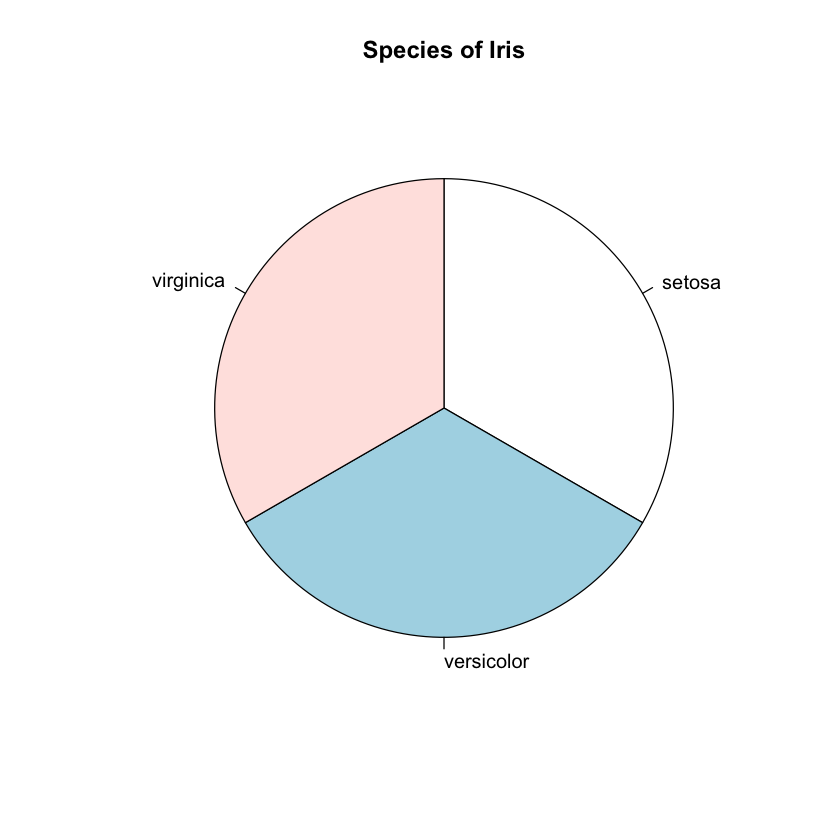

In [10]:
pie(x = table(iris$Species),
#     col = 1:3,
    clockwise = T,
    main = "Species of Iris",  
)

## 5.1.3 Histogram
##### hist(x) requires that the x is numeric.
##### Consider barplot(x) and plot(x, type = "h") if x is not numeric.

In [11]:
# Some parameters related to colors
# par(bg = "lightgreen") # par() sets graphical parameters before plots.

hist(iris$Sepal.Length,
     freq = F,             # count or proportion
     breaks = 15,
     breaks = seq(from = 4,to = 8,by = 0.5),
     xlim = range(iris$Sepal.Length),
     main = "Histogram of Sepal Length",
     sub = "Iris",
     xlab = "Sepal Length",
     col.main = "blue",
     col.axis = 2,
     col.lab = "#009933",
     col.sub = 4,           # multiple ways to specify color.
     col = "darkgreen",
     border = "blue",       # Color of border of the bars
     density = 2,           # density of shading lines
     angle = 45             # angle of shading lines, in degrees.
)
# border, density and angle are parameters specific to hist().
# Mostly showed parameters related to colors.
# Sorry I am really really really bad with colors.

ERROR: Error in hist.default(iris$Sepal.Length, freq = F, breaks = 15, breaks = seq(from = 4, : formal argument "breaks" matched by multiple actual arguments


In [ ]:
table(iris$Species)
barplot(table(iris$Species))

In [ ]:
par(mar = c(8, 4, 4, 2) + 0.1) 
# Set the margins around the plotting area
plot(table(iris$Species), type = "h", las = 2)
# las controls the orientation of axis annotations.

## 5.1.4 Boxplot

In [ ]:
boxplot(iris$Sepal.Length, iris$Sepal.Width, iris$Petal.Length, iris$Petal.Width)

## 5.1.5 Draw functions

In [ ]:
fx1 <- function(x){x^2-10}
fx2 <- function(x){x^3}

# plot(fx1, xlim = c(-10, 10))

curve(fx1,
      xlim = c(-10, 10), ylim = c(-10, 10),
      col = 2, lty = 1)
curve(fx2, add = TRUE,   # add is an parameter in curve()
      col = 3, lty = 2)  # TRUE -> plot on the existing plot

x <- seq(from = -10, to = 2, by = 0.25)
y1 <- exp(x[1:24])
y2 <- exp(x[25:49])
points(x=x[1:24], y=y1, pch = ">")  # Add these points to the existing plot
lines(x=x[25:49], y=y2)
# # Add the smooth line containing these points to the existing plot
# # lines(x=x, y=y)     

abline(h = 5, lty = 3)      # h -> horizontal line at y = 5 
abline(v = -8, lty = "dotdash")     # v => vertical line at x = -8

abline(a = -1, b = 1/2)      # y = a + bx

# # legend
legend("topright",       # Can also be "top", "bottomright", ...
       c(expression(paste(x^2-10)), expression(paste(x^3))),
       col = c(2,3),      # Usually corresponds to the plot
       lty = c(1,2),
       text.col = c(2,3))

##### Draw density functions

In [ ]:
xx <- seq(from = -10, to = 10, by = 0.1)
yy <- dnorm(xx, mean = 0, sd = 2)  
# dnorm() gives the normal distribution density
plot(x = xx, y = yy, type = "l", main = "PDF of Normal(0, 2)",
     axes = F,      # Suppress axes
     xlab = "x", ylab = "Density"
)
# axis() allows us to customize axes.
axis(1, at = seq(from = -10, to = 10, by = 4))
axis(2, at = seq(from = 0, to = 1, by = 0.02))
axis(4)
grid(col = "red")   # add grid lines.
# Explore the parameters allowed in grid()

In [ ]:
curve(dnorm, xlim = c(-10, 10))

In [ ]:
ggplot() + xlim(-10,10) + stat_function(fun = dnorm, args = list(mean = 0, sd = 2))

## 5.2 Multiple plots on one page
        - par(mfrow = )
        - layout()

In [ ]:
par(mfrow = c(2,2),                # 2 x 2 = 4 plots on the same page,
    mar = c(3, 2, 1, 1) + 0.1)     # mar allows us to change margins
plot(lm(Sepal.Length~Petal.Length, data = iris))
# lm() for linear regression - EPIB 621 material
# Plot your linear regression object will give 4 diagnostic plots.

In [ ]:
matrix(c(1,1,2,3), 2, 2, byrow = TRUE)

In [ ]:
nf <- layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
par(mar = c(3, 2, 1, 1) + 0.1)
# layout.show(nf)  # Shows the partition of the plotting area
plot(x=x, y=c(y1, y2), type = "l")
plot(x=xx, y=yy, type = "l")
boxplot(iris$Sepal.Length, iris$Petal.Length)

## 5.3 Save a plot
##### Click!
##### or

In [ ]:
pdf(file = "Normal_Density.pdf")

plot(x = xx, y = yy, type = "l",
     main = "PDF of Normal(0, 2)",
     axes = F, xlab = "x",
     ylab = "Density")
axis(1, at = seq(from = -10, to = 10, by = 2))
axis(2, at = seq(from = 0, to = 1, by = 0.02))
grid()

dev.off()

# ggsave for ggplot2

## Exercise: explore graphics and ggplot2

1. Make a pie chart using ggplot( )
2. Re-re-produce! Reproduce the ggplot( ) plot that reproduces the plot( ) plot with plot( ) in 5.1.1, or the other way around.
    - The colors
    - The background
    - The position of the legend
    - ...